# Question 1

* Cleaning the Data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the FICO dataset

df1 = pd.read_csv('C:/Users/Admin/Downloads/fico.csv')
df1.head()

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796


In [3]:
# While using tail function I found that apart from missing values, there is an error value 'SSS' in the FICO column.

df1.tail()

,acct_id,FICO
100008,99996,NaN
100009,99997,NaN
100010,99998,NaN
100011,99999,SSS
100012,100000,NaN


In [4]:
# Finding the null values in the dataset

df1.isnull().sum()

acct_id        0
FICO       29615
dtype: int64

In [5]:
df1.describe(include='all')

,acct_id,FICO
count,100013.000000,70398
unique,NaN,377
top,NaN,850
freq,NaN,12061
mean,49996.449842,NaN
std,28868.457180,NaN
min,1.000000,NaN
25%,24999.000000,NaN
50%,49994.000000,NaN
75%,74997.000000,NaN


In [6]:
# Marking and replacing all the data problems with 'Missing'

df1['FICO']=df1['FICO'].replace(np.NaN, 'Missing')
df1['FICO'] = df1['FICO'].replace('SSS', 'Missing')

In [7]:
df1['FICO']

0             768
1             850
2             677
3             843
4             796
           ...   
100008    Missing
100009    Missing
100010    Missing
100011    Missing
100012    Missing
Name: FICO, Length: 100013, dtype: object

In [8]:
# Understanding the datatype

df1['FICO'].dtypes

dtype('O')

In [9]:
# Converting the datatype of FICO column from object to string 

df1['FICO'] = pd.to_numeric(df1['FICO'], errors='coerce').astype('Int64')

In [10]:
df1['FICO'].dtypes

Int64Dtype()

In [11]:
df1.describe()

,acct_id,FICO
count,100013.000000,70396.000000
mean,49996.449842,785.748920
std,28868.457180,64.600865
min,1.000000,420.000000
25%,24999.000000,749.000000
50%,49994.000000,804.000000
75%,74997.000000,839.000000
max,100000.000000,850.000000


* Segmenting the FICO scores into 5 groups- 'Very Poor', 'Poor', 'Good', 'Very Good', 'Exceptional'

In [12]:
Bins = [300, 580, 670, 740, 800, 850]
Label = ['Very Poor', 'Poor', 'Good', 'Very Good', 'Exceptional']

In [13]:
df1['FICO_Category']= pd.cut(df1['FICO'], bins= Bins, labels = Label)

In [14]:
df1.head()

,acct_id,FICO,FICO_Category
0,1,768,Very Good
1,2,850,Exceptional
2,3,677,Good
3,4,843,Exceptional
4,5,796,Very Good


In [15]:
# Displaying the number of customers in each segment

df1['FICO_Category'].value_counts()

Exceptional    36588
Very Good      18423
Good           11117
Poor            3505
Very Poor        763
Name: FICO_Category, dtype: int64

In [16]:
# Displaying the percentage of customers in each segment

df1['FICO_Category'].value_counts(normalize=True)*100

Exceptional    51.974544
Very Good      26.170521
Good           15.792090
Poor            4.978976
Very Poor       1.083868
Name: FICO_Category, dtype: float64

<AxesSubplot:>

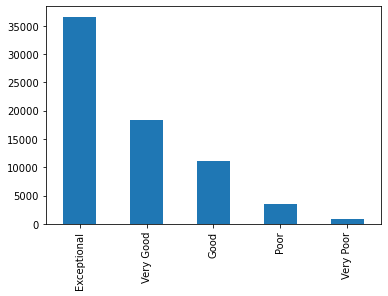

In [17]:
# Bar plot to visualize the customer segment

df1['FICO_Category'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='FICO', ylabel='Count'>

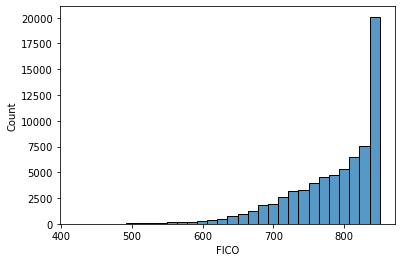

In [18]:
sns.histplot(df1['FICO'], bins = 30)

In [19]:
df1['FICO'] = df1['FICO'].astype(float)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FICO', ylabel='Density'>

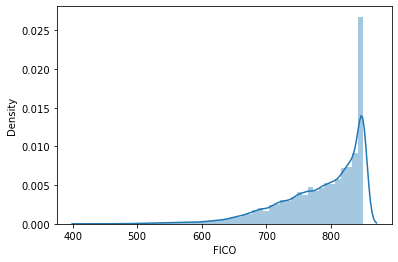

In [20]:
# Finding The distribution of FICO score.

sns.distplot(df1['FICO'])

# Question 2

In [21]:
df2 =  pd.read_csv('C:/Users/Admin/Downloads/region.csv')
df2.head(10)

,acct_id,region
0,1,New York
1,2,Dallas
2,3,Los Angeles
3,4,Chicago
4,5,Philadelphia
5,6,New York
6,7,San Antonio
7,8,San Antonio
8,9,Houston
9,10,Philadelphia


In [22]:
# Creating table to store the information of FICO score and region for each customer

df3 = pd.merge(df1, df2, on ='acct_id')
df3.head()

,acct_id,FICO,FICO_Category,region
0,1,768.0,Very Good,New York
1,2,850.0,Exceptional,Dallas
2,3,677.0,Good,Los Angeles
3,4,843.0,Exceptional,Chicago
4,5,796.0,Very Good,Philadelphia


In [23]:
df3.isnull().sum()

acct_id              0
FICO             29617
FICO_Category    29617
region               0
dtype: int64

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100186 entries, 0 to 100185
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   acct_id        100186 non-null  int64   
 1   FICO           70569 non-null   float64 
 2   FICO_Category  70569 non-null   category
 3   region         100186 non-null  object  
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [25]:
df3.region.value_counts()

Dallas          10227
San Antonio     10171
Charlotte       10039
Los Angeles     10039
New York        10025
Chicago         10006
Phoenix          9927
Houston          9925
Philadelphia     9914
San Diego        9913
Name: region, dtype: int64

In [26]:
df4 = df3.groupby('region', sort =True)

In [27]:
# Finding mean average score of each region

df4['FICO'].mean()

region
Charlotte       785.154280
Chicago         785.638187
Dallas          782.102021
Houston         786.007501
Los Angeles     785.694113
New York        785.081154
Philadelphia    785.783084
Phoenix         788.156762
San Antonio     784.508277
San Diego       784.081618
Name: FICO, dtype: float64

In [28]:
# Lowest mean average FICO score

min(df4['FICO'].mean())

782.102021174206

In [29]:
# Region with Lowest FICO score- Dallas

df5 = df4.get_group('Dallas').mean()
df5

acct_id    50144.092794
FICO         782.102021
dtype: float64

In [30]:
# Region with Second Highest FICO score- Houston

df6 = df4.get_group('Houston').mean()
df6

acct_id    49898.983778
FICO         786.007501
dtype: float64